<a href="https://colab.research.google.com/github/kevinsen-git/TF_Basics/blob/main/01_neural_network_regression_with_tensor_flow_ks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

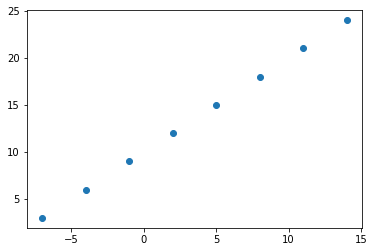

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 

# Create dummy features / independant variables
X = tf.constant([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create dummy labels / dependant variable
y = tf.constant([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it 
plt.scatter(X,y)


In [ ]:
# Set the random seed to make it reproducable
tf.random.set_seed(42)

# 1. Create a model using the Keras Sequential API 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                          
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae # Loss function is mean absolute error - this tells the model how bad it is  
              ,optimizer=tf.optimizers.SGD() # Optimizer is stochastic gradient descent - this tells the model how to get better 
              ,metrics=['mae']) # Show us how the model is performing )

# 3. Fit the model
model.fit(X,y,epochs=5) # epochs is the number of times it goes round remodelling the input data sets - i.e. iterations



Epoch 1/5
1/1 [==============================] - 1s 635ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 5ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Its pretty horrible !
# Lets run more epochs 5 to 100
model.fit(X,y,epochs=100)

In [ ]:
# Better but still horrible
# Lets change the optimiser 
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['mae']) # Adam optimizer with learning rate of 0.0001 the smaller it is the smaller steps it takes ?
model.fit(X,y,epochs=100)              


In [ ]:
# Still around 6 
# So need more hidden layers and more neurons in each 
# The epochs 5 - 100 made a difference
# The optimizer change did not do much 
# The on output layer could not do much with weights
model = tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(1)
      ])
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.SGD(), metrics=['mae'])
#model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=["mae"])
model.fit(X,y, epochs=1000)



In [ ]:
# Still not very good - around 4
# Lets add activation of relu 
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),    
    tf.keras.layers.Dense(100,activation="relu"),    
    tf.keras.layers.Dense(1)                           
])
model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(lr=0.0001),metrics=["mae"])
model.fit(X,y,epochs=100)
model.predict([17.0])
# 0s 17ms/step - loss: 0.0147 - mae: 0.0147
# So mae is 0.01
# But do we have over fitting with 7 hidden layers and one output layer ??


In [ ]:
# Leraning rate is a major contributor NORMALLY 
model=tf.keras.Sequential([
  tf.keras.layers.Dense(150,activation="relu"),
  tf.keras.layers.Dense(1)                           
])

model.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])
model.fit(X, y, epochs=100)


In [ ]:
# Wow - so one hidden layer with 100 neurons + lr of 0.01 gives 0.25 !!!
model.predict([17.00]) 

array([[27.285477]], dtype=float32)

In [ ]:
# AutoML ?
# Linear should have just two weights ...right ?
# So if we do one hidden layer with 2 neurons + lr = 0.01 + add a bit more data it should be awesome ...right ?

model = tf.keras.Sequential([
      tf.keras.layers.Dense(2, activation="relu"),
      tf.keras.layers.Dense(1)                             
      ])

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

model.fit(X, y, epochs=100)


In [ ]:
Z = tf.range(3.0, limit=213.0, delta=3, name="range")
Z

<tf.Tensor: shape=(70,), dtype=float32, numpy=
array([  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,  33.,
        36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,  66.,
        69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,  96.,  99.,
       102., 105., 108., 111., 114., 117., 120., 123., 126., 129., 132.,
       135., 138., 141., 144., 147., 150., 153., 156., 159., 162., 165.,
       168., 171., 174., 177., 180., 183., 186., 189., 192., 195., 198.,
       201., 204., 207., 210.], dtype=float32)>

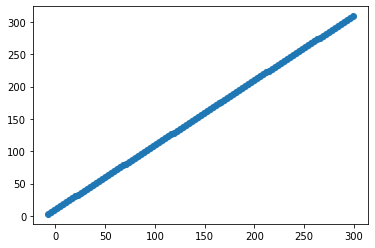

In [ ]:
# Add more data
X = tf.range(-7.0, limit=301.0, delta=3, name="range")

# Create dummy labels / dependant variable
y = tf.range(3.0, limit=312.0, delta=3, name="range")
X,y

# Visualize it 
plt.scatter(X,y)

In [ ]:
# Linear should have just two weights 
# So if we do one hidden layer with 2 neurons + lr = 0.01 + add a bit more data + a few more epochs - its is awesome !


model=tf.keras.Sequential([
        tf.keras.layers.Dense(2, activation="relu"),
        tf.keras.layers.Dense(1)
        ])

model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mse"])

model.fit(X, y, epochs=1000)

In [ ]:
X, y, model.predict([2367.0])

(<tf.Tensor: shape=(103,), dtype=float32, numpy=
 array([ -7.,  -4.,  -1.,   2.,   5.,   8.,  11.,  14.,  17.,  20.,  23.,
         26.,  29.,  32.,  35.,  38.,  41.,  44.,  47.,  50.,  53.,  56.,
         59.,  62.,  65.,  68.,  71.,  74.,  77.,  80.,  83.,  86.,  89.,
         92.,  95.,  98., 101., 104., 107., 110., 113., 116., 119., 122.,
        125., 128., 131., 134., 137., 140., 143., 146., 149., 152., 155.,
        158., 161., 164., 167., 170., 173., 176., 179., 182., 185., 188.,
        191., 194., 197., 200., 203., 206., 209., 212., 215., 218., 221.,
        224., 227., 230., 233., 236., 239., 242., 245., 248., 251., 254.,
        257., 260., 263., 266., 269., 272., 275., 278., 281., 284., 287.,
        290., 293., 296., 299.], dtype=float32)>,
 <tf.Tensor: shape=(103,), dtype=float32, numpy=
 array([  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.,  33.,
         36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,  63.,  66.,
         69.,  72.,  75.,  78.,  81., 

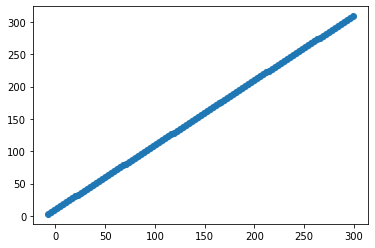

In [12]:
# Lets simplify even further 
# In theory we shpuld only need 2 parameters for a liner regression 
# Add more data
import tensorflow as tf
import matplotlib.pyplot as plt
X = tf.range(-7.0, limit=301.0, delta=3, name="range")

# Create dummy labels / dependant variable
y = tf.range(3.0, limit=312.0, delta=3, name="range")
X,y

# Visualize it 
plt.scatter(X,y)

In [22]:
# Lets do a 2 parameter model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
    ])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, y, epochs=1000)

In [24]:
model.predict([303.0])

array([[313.00827]], dtype=float32)

In [25]:
# So it works fine with two parameters 
# How to show the weights ?
model.trainable_variables

[<tf.Variable 'dense_8/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.0000353]], dtype=float32)>,
 <tf.Variable 'dense_8/bias:0' shape=(1,) dtype=float32, numpy=array([9.997576], dtype=float32)>]

In [44]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu", input_shape=[1],name="Input"),
    tf.keras.layers.Dense(1, name="Output")
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics="mae")
model.fit(X, y, epochs=10)
model.summary()

Epoch 1/10
4/4 [==============================] - 0s 3ms/step - loss: 91.0855 - mae: 91.0855
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 18.9197 - mae: 18.9197
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 35.9896 - mae: 35.9896
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 11.1588 - mae: 11.1588
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 18.0837 - mae: 18.0837
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 6.5189 - mae: 6.5189
Epoch 7/10
4/4 [==============================] - 0s 4ms/step - loss: 10.2032 - mae: 10.2032
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 7.4330 - mae: 7.4330
Epoch 9/10
4/4 [==============================] - 0s 2ms/step - loss: 5.5354 - mae: 5.5354
Epoch 10/10
4/4 [==============================] - 0s 2ms/step - loss: 6.9779 - mae: 6.9779
Model: "sequential_21"
______________________________________________________

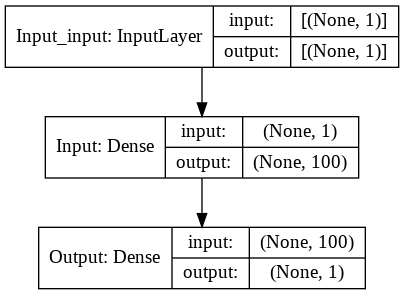

In [41]:
from tensorflow.keras.utils import plot_model as pm
pm(model=model, show_shapes=True)